## Ornstein–Uhlenbeck (OU) Process

- The Ornstein–Uhlenbeck process is a **continuous-time stochastic process** that exhibits **mean reversion**. It is commonly used to model quantities that tend to fluctuate around a long-term average, such as interest rates, spreads, volatility, or deviations from equilibrium.


### Definition (SDE)

The OU process is defined by the stochastic differential equation:

$$
dX_t = \theta (\mu - X_t)\, dt + \sigma \, dW_t
$$

### Key Theoretical Properties

- Mean:
$$
\mathbb{E}[X_t] = X_0 e^{-\theta t} + \mu(1 - e^{-\theta t})
$$

- Variance:
$$
\mathrm{Var}(X_t) = \frac{\sigma^2}{2\theta}\left(1 - e^{-2\theta t}\right)
$$

- Long-run (stationary) distribution:
$$
X_t \xrightarrow[t \to \infty]{} \mathcal{N}\left(\mu, \frac{\sigma^2}{2\theta}\right)
$$

---

### Discretization (Euler–Maruyama)

Since continuous paths cannot be simulated exactly, we use a discrete-time approximation:

$$
X_{t+\Delta t}
=
X_t
+
\theta (\mu - X_t)\Delta t
+
\sigma \sqrt{\Delta t} Z_t
$$

where:
$$
Z_t \sim \mathcal{N}(0,1)
$$

This is the standard **Euler–Maruyama discretization** used in simulations.

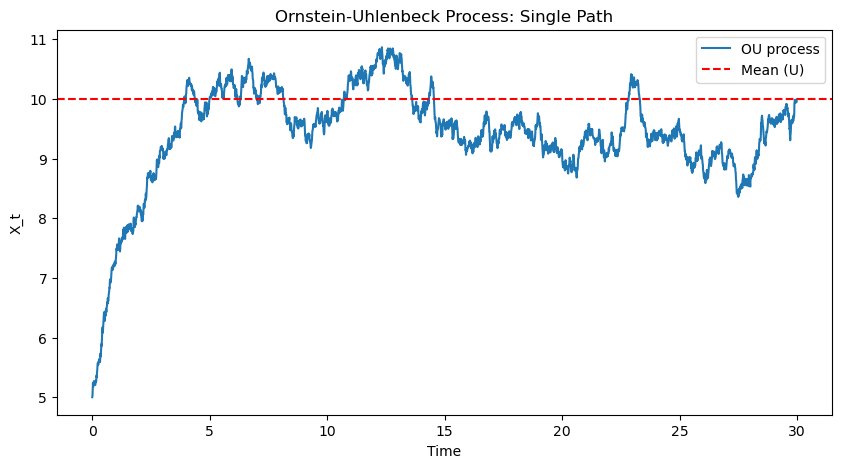

In [20]:
# Single path of the OU process

import numpy as np
import matplotlib.pyplot as plt

n = 3000  # number of time steps
X = np.zeros(n)
X[0] = 5  # starting point
theta = 0.5 # mean-reversion speed
U = 10 # mean
dt = 0.01 # granularity of each step
vol = 0.5 # volatility

for i in range(1, n):
    Z = np.random.normal()
    X[i] = X[i-1] + theta * (U - X[i-1]) * dt + vol * np.sqrt(dt) * Z


t = np.arange(n) * dt
plt.figure(figsize=(10,5))
plt.plot(t, X, label='OU process')
plt.axhline(U, color='red', linestyle='--', label='Mean (U)')
plt.xlabel('Time')
plt.ylabel('X_t')
plt.title('Ornstein-Uhlenbeck Process: Single Path')
plt.legend()
plt.show()


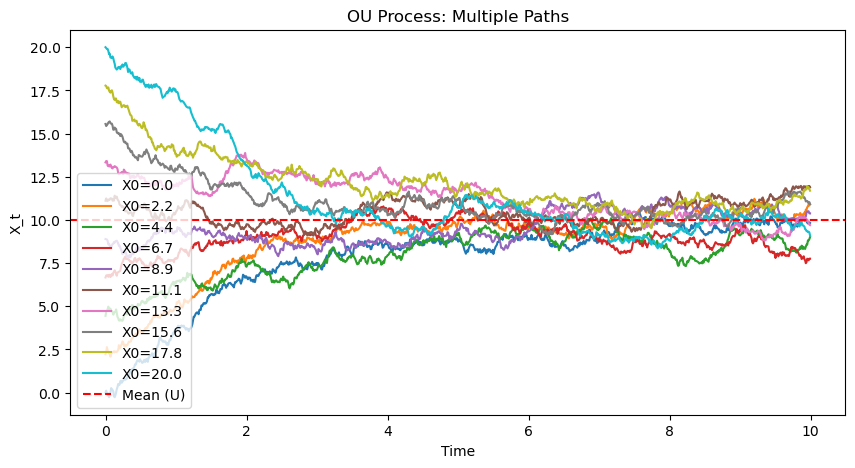

In [21]:
# Multiple paths of the OU process with same parameters but different starting points

import numpy as np
import matplotlib.pyplot as plt

n = 1000  # number of time steps
paths = 10  # number of paths
dt = 0.01
theta = 0.5
U = 10
vol = 1

# Set different starting points
X0 = np.linspace(0, 20, paths)  # e.g., 0, ~2.2, ..., 20

# Initialize array: rows = time steps, cols = paths
X = np.zeros((n, paths))
X[0, :] = X0

for i in range(1, n):
    Z = np.random.normal(size=paths)  # one Z per path
    X[i, :] = X[i-1, :] + theta * (U - X[i-1, :]) * dt + vol * np.sqrt(dt) * Z

# Plot all paths
t = np.arange(n) * dt
plt.figure(figsize=(10,5))
for j in range(paths):
    plt.plot(t, X[:, j], label=f'X0={X0[j]:.1f}')
plt.axhline(U, color='red', linestyle='--', label='Mean (U)')
plt.xlabel('Time')
plt.ylabel('X_t')
plt.title('OU Process: Multiple Paths')
plt.legend()
plt.show()